2015-01-02 17832.990234 1926.439941
2015-01-05 17501.650391 1915.75
2015-01-06 17371.640625 1882.449951
2015-01-07 17584.519531 1883.829956
2015-01-08 17907.869141 1904.650024
2015-01-09 17737.369141 1924.699951
2015-01-12 17640.839844 1920.949951
2015-01-13 17613.679688 1917.140015
2015-01-14 17427.089844 1913.660034
2015-01-15 17320.710938 1914.140015
2015-01-16 17511.570312 1888.130005
2015-01-20 17515.230469 1918.310059
2015-01-21 17554.279297 1921.22998
2015-01-22 17813.980469 1920.819946
2015-01-23 17672.599609 1936.089966
2015-01-26 17678.699219 1935.680054
2015-01-27 17387.210938 1952.400024
2015-01-28 17191.369141 1961.579956
2015-01-29 17416.849609 1951.02002
2015-01-30 17164.949219 1949.26001
2015-02-02 17361.039062 1952.680054
2015-02-03 17666.400391 1951.959961
2015-02-04 17673.019531 1962.790039
2015-02-05 17884.880859 1952.839966
2015-02-06 17824.289062 1955.52002
2015-02-09 17729.210938 1947.0
2015-02-10 17868.759766 1935.859985
2015-02-11 17862.140625 1945.699951
2015-

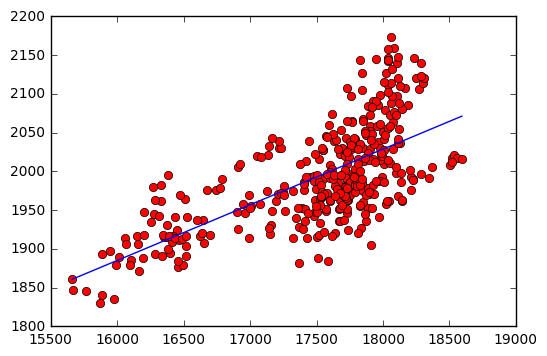

In [1]:
# -*- coding: utf-8 -*-
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)

def make_train_data():
    start = datetime.datetime(2015,1,2)
    end = datetime.datetime(2016,7,22)
    f1 = web.DataReader("^DJI",'yahoo',start,end)
    f2 = web.DataReader("^KS11",'yahoo',start,end)
    dates = []
    x_data = []
    y_data = []
    for single_date in daterange(start, end):
        date_str = single_date.strftime('%Y-%m-%d')
        try:
                f1_close = f1.ix[date_str]['Close']
        except:
                continue
        try:
                f2_close = f2.ix[date_str]['Close']
        except:
                continue
        x_data.append(f1_close)
        y_data.append(f2_close)
        dates.append(date_str)
    return dates, x_data, y_data
                
def make_poly_x(pn, x_data):
    x_datas = []
    for n in range(pn+1):
        x_datas.append([ x ** n for x in x_data ])
    return x_datas
        
def print_hypothesis(pn, theta):
    print('h(X) = ')
    for i, element in enumerate(theta):
        if i == len(theta) - 1:
            print(element.item(0), " X ** ", i)
        else:
            print(element.item(0), " X ** ", i, " + ")

def get_hypothesis(pn, theta, x):
    y = 0
    for i, element in enumerate(theta):
        y += ( element.item(0) * ( x ** i) )
    return y
    
def get_sumerror(pn, theta, x_data, y_data):
    s = 0
    for i, x in enumerate(x_data):
      s += ( (y_data[i] - get_hypothesis(pn, theta, x)) ** 2)
    return s

# 프로그램 시작
PICKLE_FILE = 'data.pck'
import os.path
if os.path.isfile(PICKLE_FILE): 
    f = open('data.pck', 'rb')
    dates, x_data, y_data = pickle.load(f)
else:
    dates, x_data, y_data = make_train_data()
    f = open('data.pck', 'wb')
    pickle.dump([dates, x_data, y_data], f) 
f.close()

for i in range(len(dates)):
    print(dates[i], x_data[i], y_data[i])
    
# 정규방정식(normal equation) 알고리즘을 통해 cost 최소가 되는 가설함수를 찾습니다. 
print()
POLY = 1
x_datas = make_poly_x(POLY, x_data)
X = np.matrix(x_datas).transpose()
Xt = np.matrix(x_datas)
Y = np.matrix(y_data).transpose()
theta = np.dot(np.dot(np.linalg.pinv(np.dot(Xt, X)), Xt), Y)
print_hypothesis(POLY, theta)
print('get_sumerror : ', get_sumerror(POLY, theta, x_data, y_data))

# 다우존스지수가 18313.77일 때 코스피지수 값을 예측합니다.
print()
x_test = 18313.77
y_test = get_hypothesis(POLY, theta, x_test)
print('2016-08-02 DOW30 : ', x_test)
print('2016-08-02 estimated KOSPI : ', y_test)
print('2016-08-02 KOSPI : ', 2019.03)

# 그래프를 그립니다.
plt.plot(x_data, y_data, 'ro')
line_x = [ x for x in range( int(min(x_data)), int(max(x_data)) ) ]
line_y = [ get_hypothesis(POLY, theta, x) for x in range( int(min(x_data)), int(max(x_data)) ) ]
plt.plot(line_x, line_y)
plt.show()